ECONOMIC DATA ANALYSIS

In [11]:
!pip install fredapi 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
from fredapi import Fred

plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns',500)
color_pal=plt.rcParams['axes.prop_cycle'].by_key()['color']

In [3]:
fred_key='9652e799a3cb60819e1a7457b22a8cfe'

In [4]:
fred=Fred(api_key=fred_key)

In [5]:
sp_search=fred.search('S&P', order_by='popularity') # Podemos realizar una busqueda directamente desde aqui
#ordenamos los datos por popularidad

In [6]:
sp_search.head()

id realtime_start realtime_end  \
series id                                                    
BAMLH0A0HYM2      BAMLH0A0HYM2     2025-04-10   2025-04-10   
CSUSHPINSA          CSUSHPINSA     2025-04-10   2025-04-10   
SP500                    SP500     2025-04-10   2025-04-10   
BAMLH0A0HYM2EY  BAMLH0A0HYM2EY     2025-04-10   2025-04-10   
BAMLC0A0CM          BAMLC0A0CM     2025-04-10   2025-04-10   

                                                            title  \
series id                                                           
BAMLH0A0HYM2    ICE BofA US High Yield Index Option-Adjusted S...   
CSUSHPINSA      S&P CoreLogic Case-Shiller U.S. National Home ...   
SP500                                                     S&P 500   
BAMLH0A0HYM2EY       ICE BofA US High Yield Index Effective Yield   
BAMLC0A0CM      ICE BofA US Corporate Index Option-Adjusted Sp...   

               observation_start observation_end     frequency  \
series id                                                        
BAMLH0A0HYM2          1996-12-31      2025-04-08  Daily, Close   
CSUSHPINSA            1987-01-01      2025-01-01       Monthly   
SP500                 2015-04-10      2025-04-09  Daily, Close   
BAMLH0A0HYM2EY        1996-12-31      2025-04-08  Daily, Close   
BAMLC0A0CM            1996-12-31      2025-04-08  Daily, Close   

               frequency_short               units         units_short  \
series id                                                                
BAMLH0A0HYM2                 D             Percent                   %   
CSUSHPINSA                   M  Index Jan 2000=100  Index Jan 2000=100   
SP500                        D               Index               Index   
BAMLH0A0HYM2EY               D             Percent                   %   
BAMLC0A0CM                   D             Percent                   %   

                    seasonal_adjustment seasonal_adjustment_short  \
series id                                                           
BAMLH0A0HYM2    Not Seasonally Adjusted                       NSA   
CSUSHPINSA      Not Seasonally Adjusted                       NSA   
SP500           Not Seasonally Adjusted                       NSA   
BAMLH0A0HYM2EY  Not Seasonally Adjusted                       NSA   
BAMLC0A0CM      Not Seasonally Adjusted                       NSA   

                             last_updated popularity  \
series id                                              
BAMLH0A0HYM2    2025-04-09 08:45:12-05:00         92   
CSUSHPINSA      2025-03-25 08:12:25-05:00         88   
SP500           2025-04-09 19:11:54-05:00         83   
BAMLH0A0HYM2EY  2025-04-09 08:45:15-05:00         82   
BAMLC0A0CM      2025-04-09 08:52:01-05:00         78   

                                                            notes  
series id                                                          
BAMLH0A0HYM2    The ICE BofA Option-Adjusted Spreads (OASs) ar...  
CSUSHPINSA      For more information regarding the index, plea...  
SP500           The observations for the S&P 500 represent the...  
BAMLH0A0HYM2EY  This data represents the effective yield of th...  
BAMLC0A0CM      The ICE BofA Option-Adjusted Spreads (OASs) ar...

In [12]:
sp500=fred.get_series(series_id='SP500')  # una vez elegidos los datos a analizar, los obtenemos con get_series()

<Axes: title={'center': 'S&P 500'}>

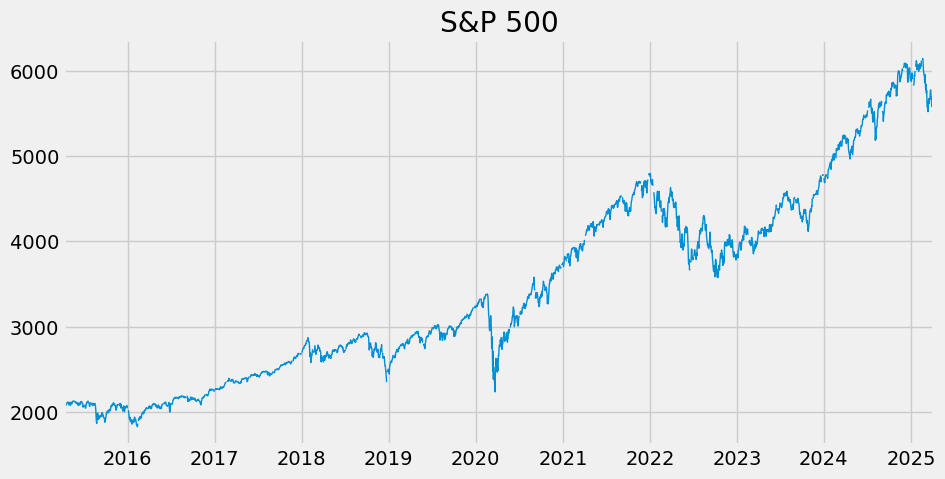

In [13]:
sp500.plot(figsize=(10,5),title='S&P 500',linewidth=1)

In [16]:
unrate=fred.get_series(series_id='UNRATE') 

<Axes: >

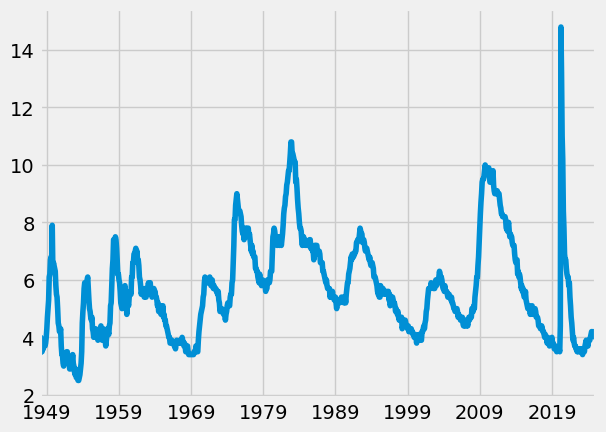

In [18]:
unrate.plot()

In [20]:
unemp_df=fred.search('unemployment rate state', filter=('frequency','Monthly'))

In [22]:
unemp_df=unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"') # selecionamos datas con ciertas caracterirticas

In [24]:
unemp_df['new_title']=unemp_df['title'].str.replace('Unemployment Rate in ','') # creamos nuevo titulo tomando solo el nombre del estado

In [26]:
# nos queremos quedar solo con el nombre de los estados. Puedo eliminar los titulos con mas de 4 palabras
unemp_states_df=unemp_df.loc[unemp_df['new_title'].apply(lambda x: len(x.split()) < 4)]


In [28]:
# eliminamos la fila UNRATE
#unemp_states_df.drop(index='UNRATE')

In [30]:
unemp_states_df.shape # solo tenemos 28 estados

(29, 16)

In [32]:
# creo diccionario con el nombre del esatdo y el estado al que corresponde
unemp_states_id=unemp_states_df['new_title'].to_dict()
unemp_states_id

{'UNRATE': 'Unemployment Rate',
 'CAUR': 'California',
 'TXUR': 'Texas',
 'NYUR': 'New York',
 'FLUR': 'Florida',
 'PAUR': 'Pennsylvania',
 'OHUR': 'Ohio',
 'MIUR': 'Michigan',
 'ALUR': 'Alabama',
 'MAUR': 'Massachusetts',
 'NCUR': 'North Carolina',
 'ILUR': 'Illinois',
 'NJUR': 'New Jersey',
 'GAUR': 'Georgia',
 'COUR': 'Colorado',
 'AZUR': 'Arizona',
 'WIUR': 'Wisconsin',
 'VAUR': 'Virginia',
 'KYUR': 'Kentucky',
 'SCUR': 'South Carolina',
 'NMUR': 'New Mexico',
 'MNUR': 'Minnesota',
 'TNUR': 'Tennessee',
 'WAUR': 'Washington',
 'MDUR': 'Maryland',
 'ORUR': 'Oregon',
 'WVUR': 'West Virginia',
 'NVUR': 'Nevada',
 'ARUR': 'Arkansas'}

In [34]:
unemp_states_df.index

Index(['UNRATE', 'CAUR', 'TXUR', 'NYUR', 'FLUR', 'PAUR', 'OHUR', 'MIUR',
       'ALUR', 'MAUR', 'NCUR', 'ILUR', 'NJUR', 'GAUR', 'COUR', 'AZUR', 'WIUR',
       'VAUR', 'KYUR', 'SCUR', 'NMUR', 'MNUR', 'TNUR', 'WAUR', 'MDUR', 'ORUR',
       'WVUR', 'NVUR', 'ARUR'],
      dtype='object', name='series id')

In [36]:
# voy a recorrer todos los ids y almcenar los resultados seleecionados de cada uno de ellos

all_results=[]
for myid in unemp_states_df.index:
    results=fred.get_series(myid)
    results=results.to_frame(name=myid)
    all_results.append(results)
    

In [38]:
# los hemos almacenamdo en un lista. Ahora los concatenamos
unemp_states_results=pd.concat(all_results,axis=1)

In [40]:
unemp_states_results.head()

UNRATE  CAUR  TXUR  NYUR  FLUR  PAUR  OHUR  MIUR  ALUR  MAUR  \
1948-01-01     3.4   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1948-02-01     3.8   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1948-03-01     4.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1948-04-01     3.9   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1948-05-01     3.5   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

            NCUR  ILUR  NJUR  GAUR  COUR  AZUR  WIUR  VAUR  KYUR  SCUR  NMUR  \
1948-01-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1948-02-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1948-03-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1948-04-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1948-05-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

            MNUR  TNUR  WAUR  MDUR  ORUR  WVUR  NVUR  ARUR  
1948-01-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
1948-02-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
1948-03-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
1948-04-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
1948-05-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN

In [42]:
# cambiamos el nombre de los archivos por el del esatdo correspondiente obtenido antes
unemp_states_results.rename(columns=unemp_states_id, inplace=True)
unemp_states_results.head()

Unemployment Rate  California  Texas  New York  Florida  \
1948-01-01                3.4         NaN    NaN       NaN      NaN   
1948-02-01                3.8         NaN    NaN       NaN      NaN   
1948-03-01                4.0         NaN    NaN       NaN      NaN   
1948-04-01                3.9         NaN    NaN       NaN      NaN   
1948-05-01                3.5         NaN    NaN       NaN      NaN   

            Pennsylvania  Ohio  Michigan  Alabama  Massachusetts  \
1948-01-01           NaN   NaN       NaN      NaN            NaN   
1948-02-01           NaN   NaN       NaN      NaN            NaN   
1948-03-01           NaN   NaN       NaN      NaN            NaN   
1948-04-01           NaN   NaN       NaN      NaN            NaN   
1948-05-01           NaN   NaN       NaN      NaN            NaN   

            North Carolina  Illinois  New Jersey  Georgia  Colorado  Arizona  \
1948-01-01             NaN       NaN         NaN      NaN       NaN      NaN   
1948-02-01             NaN       NaN         NaN      NaN       NaN      NaN   
1948-03-01             NaN       NaN         NaN      NaN       NaN      NaN   
1948-04-01             NaN       NaN         NaN      NaN       NaN      NaN   
1948-05-01             NaN       NaN         NaN      NaN       NaN      NaN   

            Wisconsin  Virginia  Kentucky  South Carolina  New Mexico  \
1948-01-01        NaN       NaN       NaN             NaN         NaN   
1948-02-01        NaN       NaN       NaN             NaN         NaN   
1948-03-01        NaN       NaN       NaN             NaN         NaN   
1948-04-01        NaN       NaN       NaN             NaN         NaN   
1948-05-01        NaN       NaN       NaN             NaN         NaN   

            Minnesota  Tennessee  Washington  Maryland  Oregon  West Virginia  \
1948-01-01        NaN        NaN         NaN       NaN     NaN            NaN   
1948-02-01        NaN        NaN         NaN       NaN     NaN            NaN   
1948-03-01        NaN        NaN         NaN       NaN     NaN            NaN   
1948-04-01        NaN        NaN         NaN       NaN     NaN            NaN   
1948-05-01        NaN        NaN         NaN       NaN     NaN            NaN   

            Nevada  Arkansas  
1948-01-01     NaN       NaN  
1948-02-01     NaN       NaN  
1948-03-01     NaN       NaN  
1948-04-01     NaN       NaN  
1948-05-01     NaN       NaN

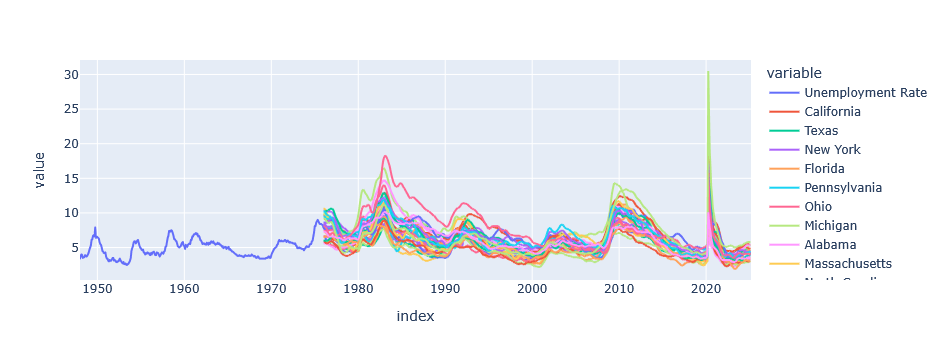

In [45]:
# Plot States Unemplyment rates
px.line(unemp_states_results) #plotly express

In [47]:
# Analizamos Abril 2020 por estados

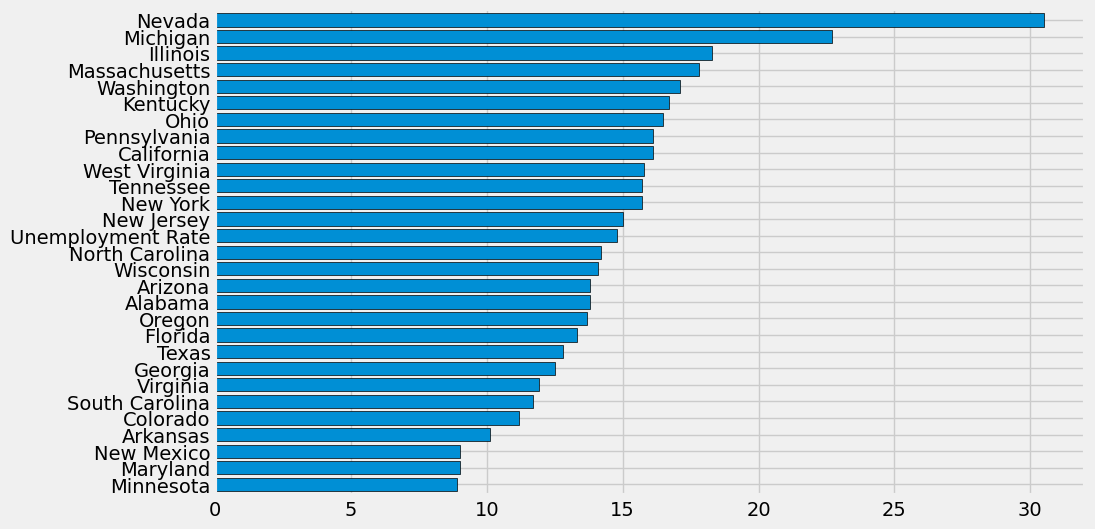

In [49]:
ax=unemp_states_results.loc[unemp_states_results.index=='2020-04-01'].T.sort_values('2020-04-01').plot(kind='barh', figsize=(10,6), width=0.8,edgecolor='black')
ax.legend().remove()
plt.show()

In [51]:
# Ratio de participación
part_df=fred.search('participation rate state', filter=('frequency','Monthly'))
part_df=part_df.query('seasonal_adjustment=="Seasonally Adjusted" and units=="Percent"')

In [52]:
part_df['new_title']=part_df['title'].str.replace('Labor Force Participation Rate for ','') # creamos nuevo titulo tomando solo el nombre del estado

In [55]:
part_states_df=part_df.loc[part_df['new_title'].apply(lambda x: len(x.split()) < 4 )] # tomamos solo los datos de los estados (nombre de archivos menor de 4 palabras)

In [57]:
part_states_df.shape # confirmamos que tenemos los 51 estados

(51, 16)

In [59]:
part_satates_id=part_states_df['new_title'].to_dict() # creamos un diccionario con los nombre de cada estado para cada archivo

In [61]:
part_states_df.index

Index(['LBSSA06', 'LBSSA01', 'LBSSA36', 'LBSSA26', 'LBSSA28', 'LBSSA48',
       'LBSSA12', 'LBSSA21', 'LBSSA39', 'LBSSA55', 'LBSSA42', 'LBSSA25',
       'LBSSA27', 'LBSSA24', 'LBSSA54', 'LBSSA47', 'LBSSA23', 'LBSSA17',
       'LBSSA37', 'LBSSA13', 'LBSSA22', 'LBSSA45', 'LBSSA08', 'LBSSA49',
       'LBSSA51', 'LBSSA18', 'LBSSA29', 'LBSSA34', 'LBSSA19', 'LBSSA02',
       'LBSSA53', 'LBSSA04', 'LBSSA35', 'LBSSA16', 'LBSSA05', 'LBSSA40',
       'LBSSA31', 'LBSSA15', 'LBSSA32', 'LBSSA30', 'LBSSA41', 'LBSSA33',
       'LBSSA50', 'LBSSA09', 'LBSSA38', 'LBSSA46', 'LBSSA20', 'LBSSA44',
       'LBSSA11', 'LBSSA10', 'LBSSA56'],
      dtype='object', name='series id')

In [63]:
# como en el ejmplo anterior leemos todos los datos para extraer la tasa
part_results=[]
for id_data in part_states_df.index:
    resultados=fred.get_series(id_data)
    resultados=resultados.to_frame(name=id_data)
    part_results.append(resultados)

In [64]:
part_states=pd.concat(part_results,axis=1) # concatenamos todos los datos

In [67]:
part_states.rename(columns=part_satates_id, inplace=True) # renombramos columnas con el diccionarioa anterior

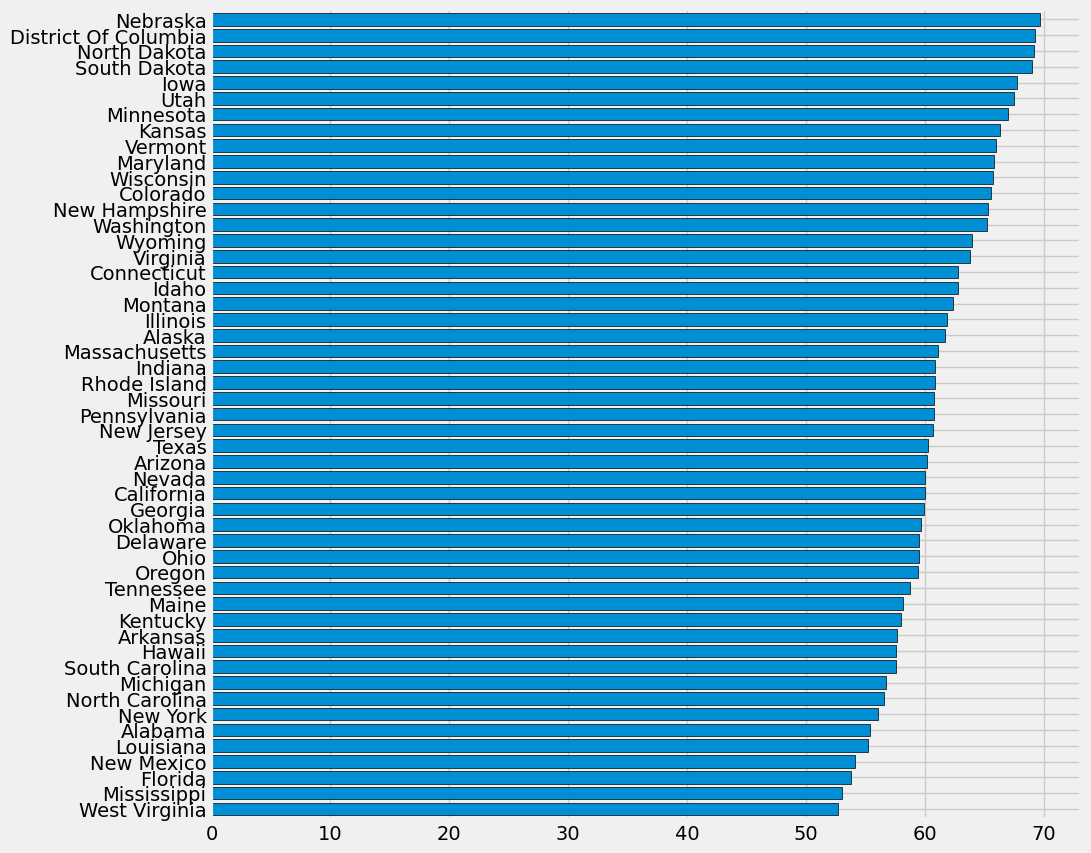

In [69]:
ax1=part_states.loc[part_states.index=='2020-04-01'].T.sort_values('2020-04-01').plot(kind='barh', figsize=(10,10) ,width=0.8,edgecolor='black')
ax1.legend().remove()
plt.show()

Plot Unemplyment vs Participation

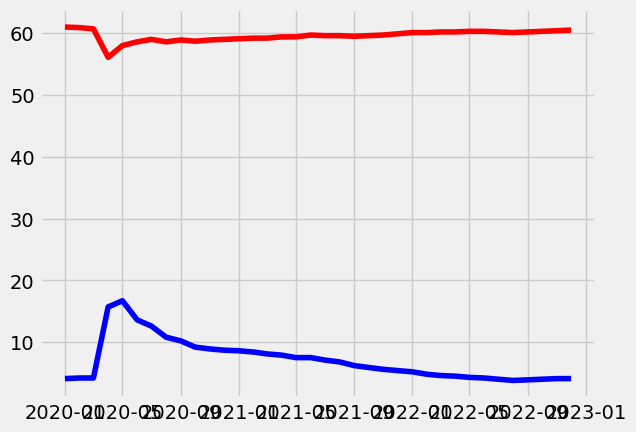

In [73]:
fig, ax=plt.subplots()
# Una forma:
# unemp_states_results.query('index >= 2020 and index < 2022')['New York'].plot(ax=ax)
# part_states.query('index >= 2020 and index < 2022')['New York'].plot(ax=ax)
#Otra  forma:
ax.plot(unemp_states_results.loc['2020':'2022', 'New York'], label="Unemployment Rate", color="blue")
ax.plot(part_states.loc['2020':'2022', 'New York'], label="Labor Participation Rate", color="red")



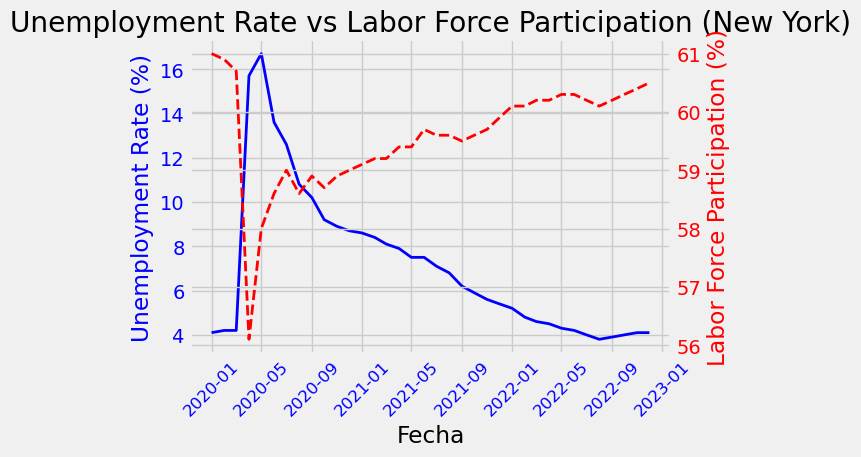

In [203]:
# usamos método twinx() para crear dos graficos con disitnos ejes unidos
import matplotlib.dates as mdates

fig, ax1=plt.subplots()

ax1.plot(unemp_states_results.loc["2020":"2022", "New York"], 
         label="Unemployment Rate", color='blue', linestyle='-', linewidth=2)
ax1.set_ylabel("Unemployment Rate (%)", color='blue')
ax1.tick_params(axis="y", labelcolor='blue')
ax1.tick_params(axis="x", labelcolor='blue',labelsize=12, rotation=45)

ax2=ax1.twinx() # creamos segundo eje y

ax2.plot(part_states.loc["2020":"2022", "New York"], 
         label="Labor Force Participation", color="red", linestyle='--', linewidth=2)
ax2.set_ylabel("Labor Force Participation (%)", color="red")
ax2.tick_params(axis="y", labelcolor="red")
ax2.tick_params(axis="x", labelcolor='blue',labelsize=12, rotation=45)


# Configuración del gráfico
ax1.set_title("Unemployment Rate vs Labor Force Participation (New York)")
ax1.set_xlabel("Fecha")
fig.tight_layout()  # Ajustar márgenes para que no se sobrepongan

plt.show()


In [77]:
# vamos a hacerlo para todos los estados

In [105]:
part_states=part_states[sorted(part_states.columns)] #ordenamos alfabeticamente las columnas

In [103]:
unemp_states_results=unemp_states_results[sorted(unemp_states_results.columns)]

In [111]:
unemp_states_results.shape

(927, 29)

In [113]:
part_states.shape

(590, 51)

In [135]:
# observamos como en el primero doumentos nos faltan estados
# veamos cuales:
part_states_dict=part_states.columns # almacenamos columnas
unemp_states_results_dict=unemp_states_results.columns

In [123]:
part_states_dict


Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'District Of Columbia', 'Florida', 'Georgia',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky',
       'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan',
       'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object')

In [149]:
lista_eliminar1=[]
for i in part_states:
    if i in unemp_states_results:
        continue
    else:
        lista_eliminar1.append(i)
    

In [157]:
# eliminarmos estas columnas de dl data frame para tener los mismos estados
for j in lista_eliminar1:
    part_states.drop(columns=j, inplace=True)


In [161]:
# eliminamos también columna Unemployment rate del df
unemp_states_results.drop(columns='Unemployment Rate', inplace=True)

In [159]:
part_states.shape

(590, 28)

In [163]:
unemp_states_results.shape

(927, 28)

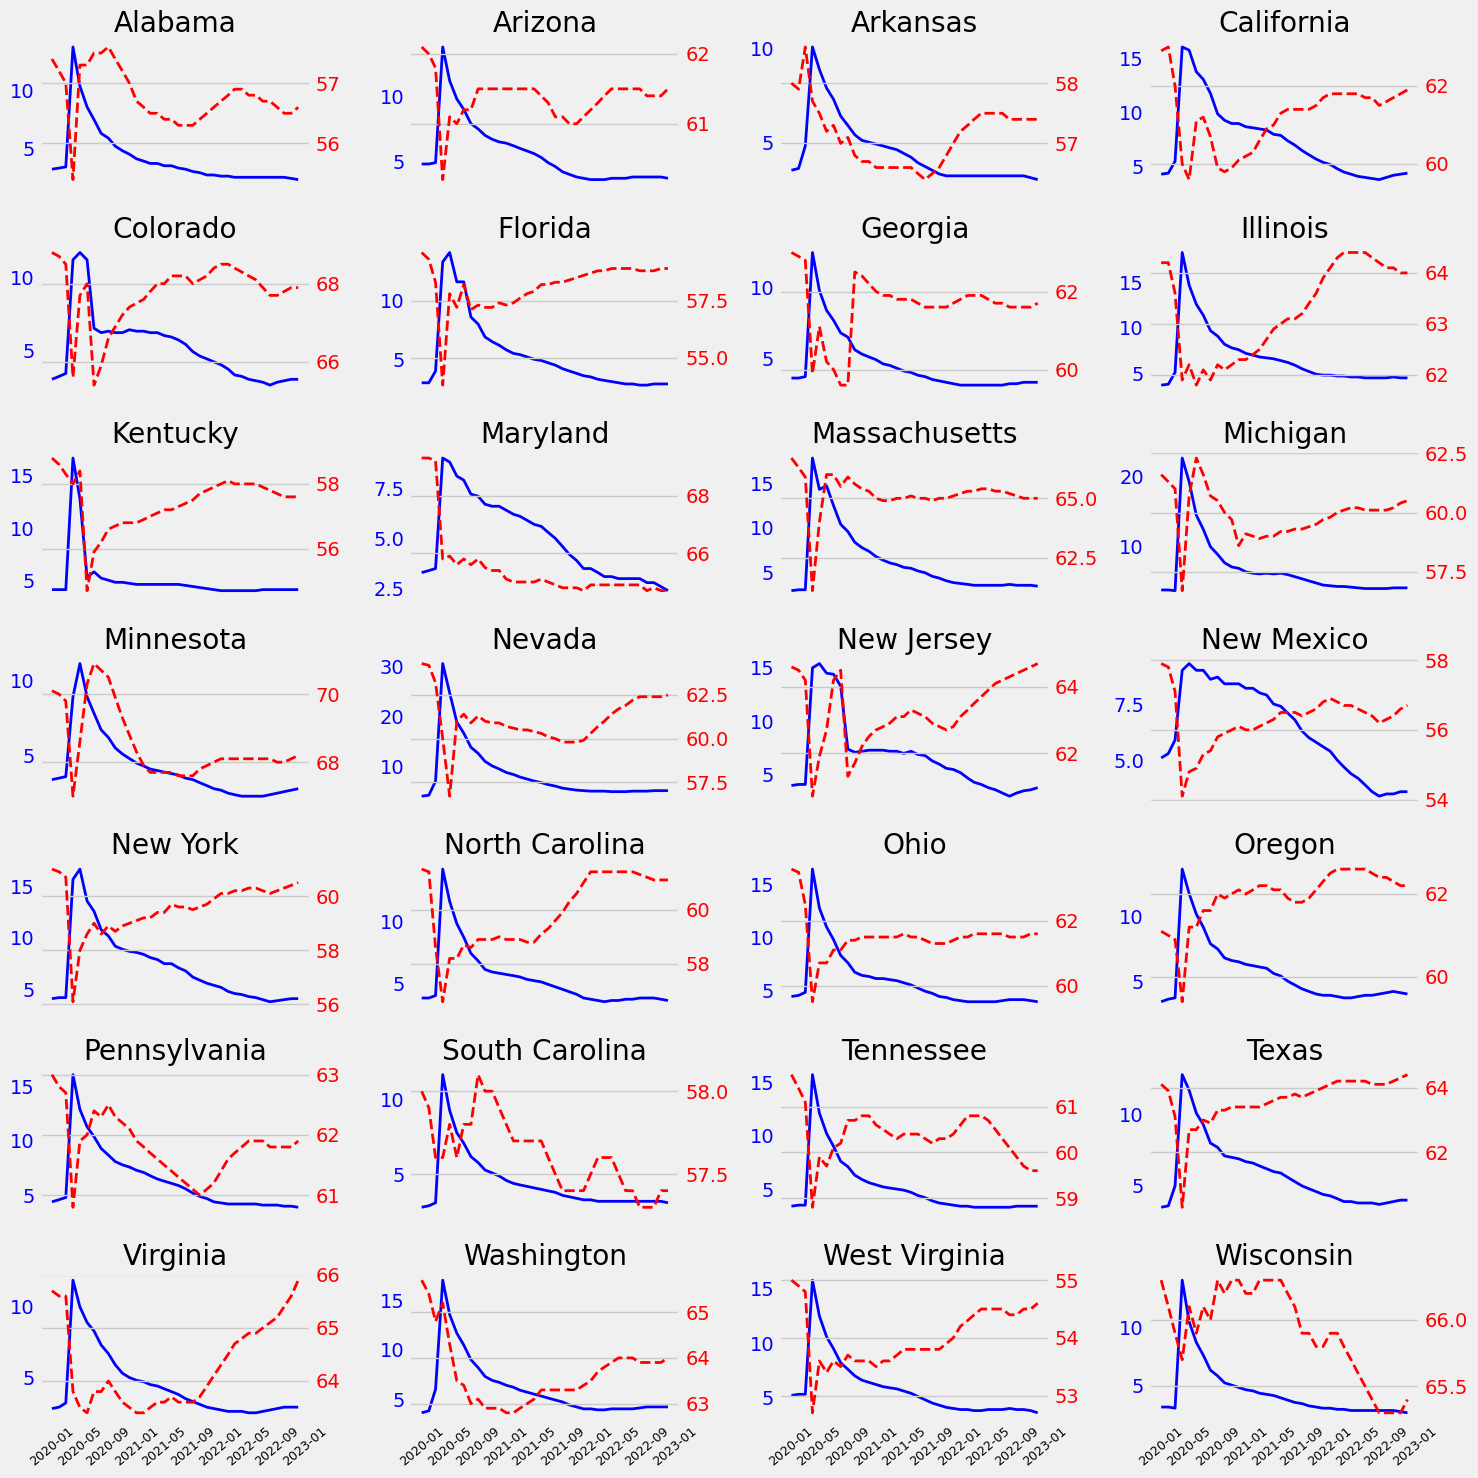

In [209]:
# ya tenemos los dos df con los mismos estados
# hacemos los graficos conjuntos de todos los estados

import matplotlib.pyplot as plt

# Crear los subgráficos
fig, ax1 = plt.subplots(7, 4, figsize=(15, 15), sharex=True)  # Ajustamos el tamaño de la figura (15,15) y los subplots (7,4). Compartimos eje x
ax1 = ax1.flatten()  # Convertimos la matriz 2D a un vector 1D (ax1[0], ax1[1].....ax1[27])

i = 0 # Comenzamos en el primer índice (subgráfico)
for state in unemp_states_results.columns:  # Iteramos sobre las columnas (estados)
    ax1[i].plot(unemp_states_results.loc["2020":"2022", state], label="Unemployment Rate", color='blue', linestyle='-', linewidth=2)
    
    ax1[i].tick_params(axis="y", labelcolor='blue')
    ax1[i].tick_params(axis="x", labelcolor='black',labelsize=9, rotation=40)
    
    ax2 = ax1[i].twinx()  # Creamos un segundo eje y en el mismo subgráfico

    # Graficamos la serie de la participación en la fuerza laboral
    ax2.plot(part_states.loc["2020":"2022", state], label="Labor Force Participation", color="red", linestyle='--', linewidth=2)
    
    # Establecemos etiquetas para el segundo eje y
    
    ax2.tick_params(axis="y", labelcolor="red")
    ax2.tick_params(axis="x", labelcolor='black',labelsize=9, rotation=40)

    # Establecemos título y etiquetas para el eje x
    ax1[i].set_title(state)
    

    # Desactivamos el grid
    ax1[i].grid(False)

    i += 1  # Aumentamos el índice para el siguiente subgráfico

# Ajustamos el diseño para que los gráficos no se solapen
fig.tight_layout()

# Mostramos el gráfico
plt.show()

